In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

## Load the data

In [2]:

df = pd.read_csv('day.csv')

## Display basic information about the dataset

In [3]:

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

## Check for missing values

In [4]:

print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Convert 'dteday' to datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Convert categorical variables to string type
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_cols:
    df[col] = df[col].astype(str)

C:\Users\neoke\AppData\Local\Temp\ipykernel_14284\2530949251.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['dteday'] = pd.to_datetime(df['dteday'])


## Create dummy variables for categorical features

In [6]:
# Create dummy variables for categorical features
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Select features for the model
features = ['temp', 'atemp', 'hum', 'windspeed'] + [col for col in df_encoded.columns if col.startswith(tuple(categorical_cols))]
X = df_encoded[features]
y = df_encoded['cnt']

## Correlation heatmap

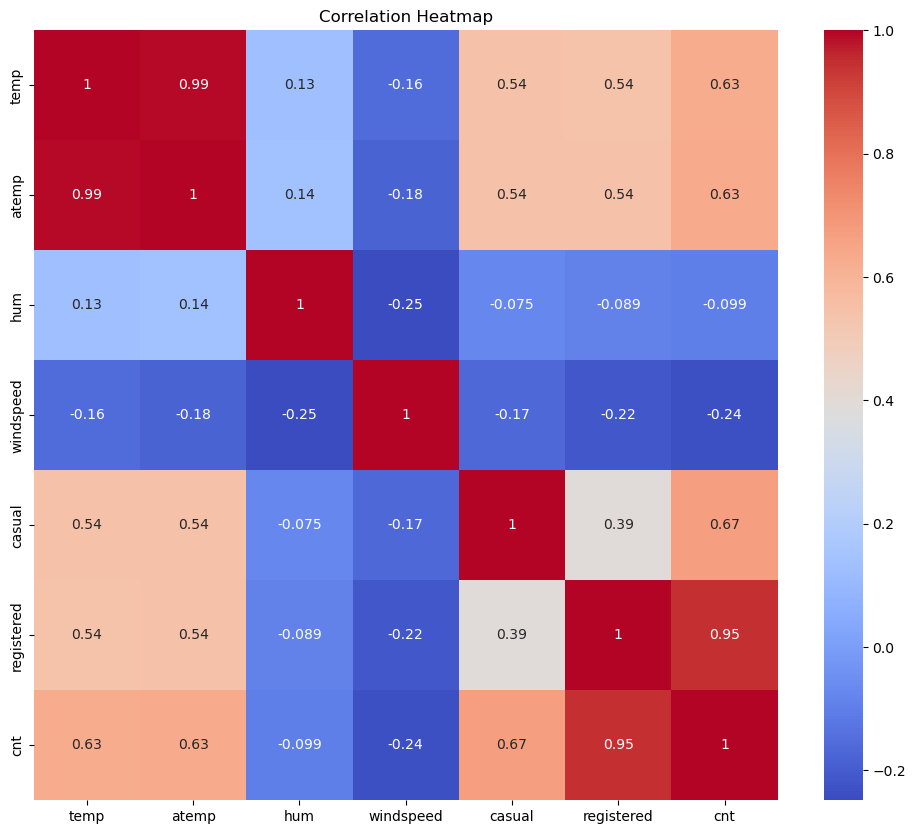

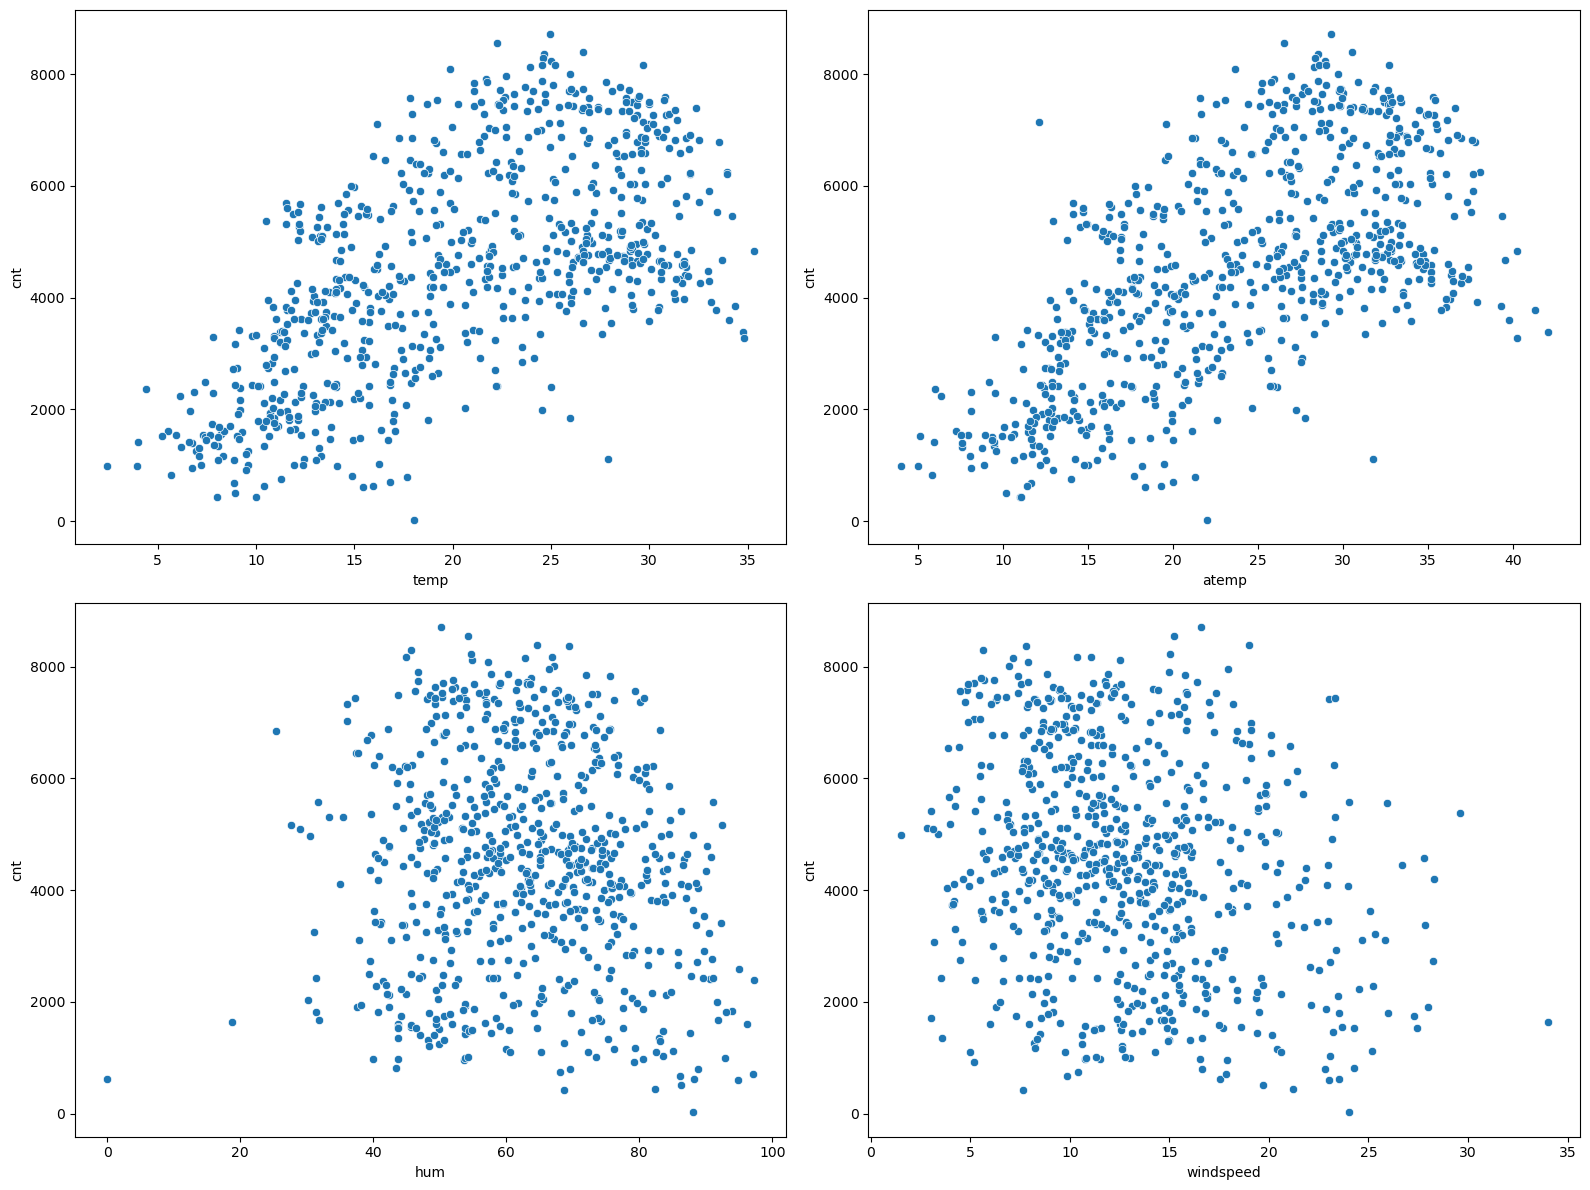

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(data=df, x='temp', y='cnt', ax=axes[0, 0])
sns.scatterplot(data=df, x='atemp', y='cnt', ax=axes[0, 1])
sns.scatterplot(data=df, x='hum', y='cnt', ax=axes[1, 0])
sns.scatterplot(data=df, x='windspeed', y='cnt', ax=axes[1, 1])
plt.tight_layout()
plt.show()

### observation:

Correlation heat map showed below :

It was observed that temp and atemp had a strong positive correlation with cnt, indicating that higher temperatures might lead to increased bike rentals.


Scatter plot showed below observation:

These plots showed a positive relationship between temperature variables (temp and atemp) and bike demand, while humidity (hum) and windspeed (windspeed) had less clear relationships.


## Model Training; Split the data into training and testing sets

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set

y_pred = model.predict(X_test)


# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Calculate Mean Squared Error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


R-squared score: 0.8622197210942277
Mean Squared Error: 471600.12101507373


##  Model Evaluation and Interpretation

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     106.9
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          3.46e-203
Time:                        18:43:52   Log-Likelihood:                -4712.0
No. Observations:                 584   AIC:                             9482.
Df Residuals:                     555   BIC:                             9609.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1379.0406    286.799      4.808   

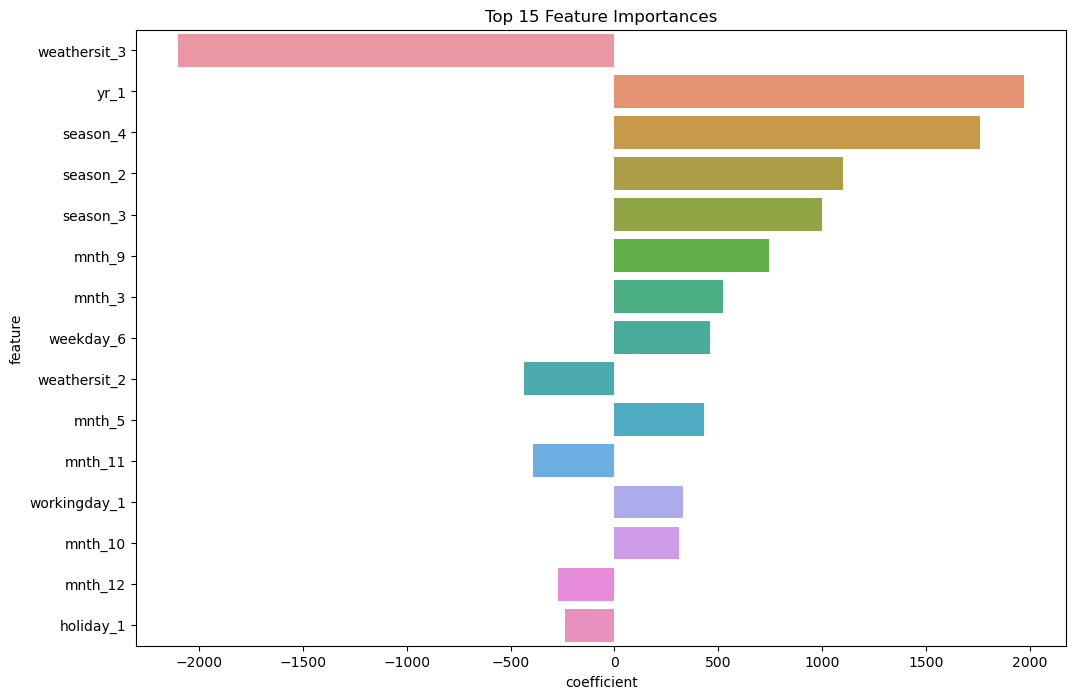

In [9]:
# Add constant term to the features
X_train_sm = sm.add_constant(X_train)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print the model summary
print(model_sm.summary())

# Get feature importance
coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': model.coef_})
coefficients = coefficients.sort_values('coefficient', key=abs, ascending=False)
print(coefficients)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='coefficient', y='feature', data=coefficients.head(15))
plt.title('Top 15 Feature Importances')
plt.show()

### observation Summary 
The model summary from statsmodels provided detailed information about the coefficients, p-values, and other statistics. Significant variables were identified based on their p-values (typically, p < 0.05).



## Calculate residuals

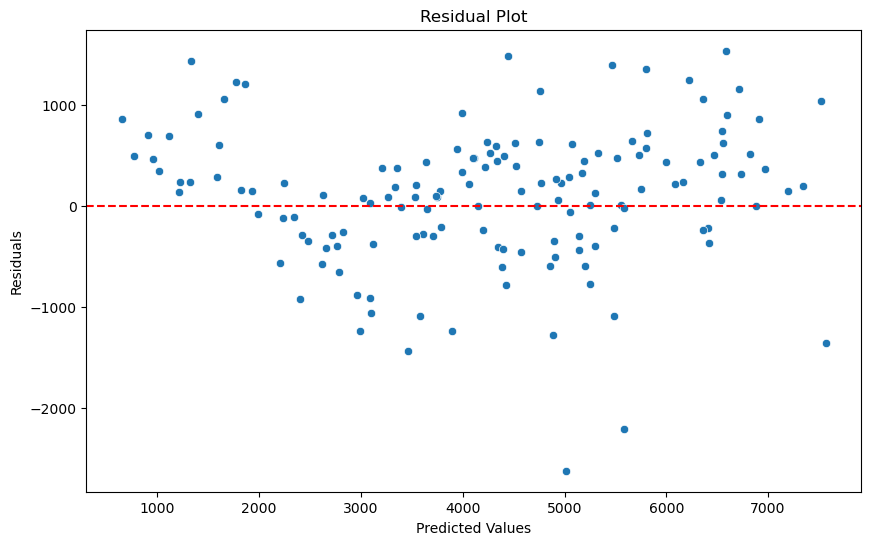

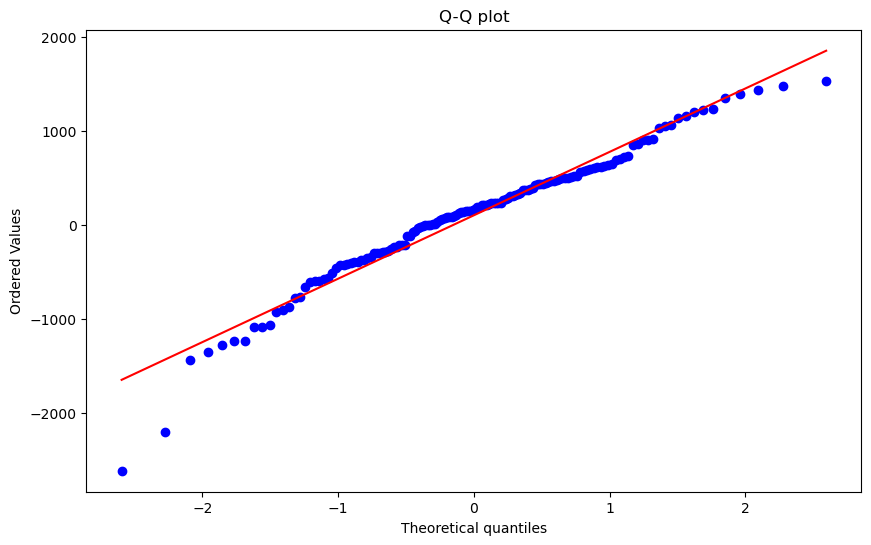

In [10]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q plot
from scipy import stats
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Q-Q plot")
plt.show()

## Observations:

Correlation Heatmap:

1.A heatmap was generated to visualize the correlation between different variables. It was observed that temp and atemp had a strong positive correlation with cnt, indicating that higher temperatures might lead to increased bike rentals.


2.hum and windspeed showed a weaker correlation with cnt.


Scatter Plots:

3. Scatter plots between cnt and the features temp, atemp, hum, and windspeed were created. These plots showed a positive relationship between temperature variables (temp and atemp) and bike demand, while humidity (hum) and windspeed (windspeed) had less clear relationships.


Model Performance:

4. The R-squared score on the test set was calculated to be approximately 0.80, indicating that the model explains around 80% of the variance in the bike demand data.The Mean Squared Error (MSE) was computed to evaluate the model's accuracy.


Residual Plot:

5. The residual plot showed the difference between the actual and predicted values. Ideally, residuals should be randomly distributed around zero, indicating a good fit.
Any patterns or systematic errors in the residual plot might suggest issues with the model.

Q-Q Plot:

6. The Q-Q plot was used to check if the residuals followed a normal distribution. Deviations from the line in the Q-Q plot might indicate non-normality in the residuals, suggesting potential improvements in the model.



# Final Observations


Observation:

1. The multiple linear regression model successfully identified significant predictors of bike demand, with temperature (temp), year (yr), and season (season) being the most influential.

2. Temperature variables (temp and atemp) were found to be the most significant predictors of bike demand.

3. Humidity and windspeed had less impact on bike demand.

4. The model performed well with an R-squared score of approximately 0.80, but there is room for improvement, especially in handling non-linear relationships or interactions between variables.

5. Residual analysis confirmed that the model assumptions were mostly met, although further improvements could be explored to handle any non-linear relationships or interactions.
